<a href="https://colab.research.google.com/github/D4n1elR0drigues/TCC/blob/main/EXECU%C3%87%C3%83O_TREINADO_%5BMain_Code%5D_Trading_Robot_4_0_Deep_Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import math
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas_datareader as data_reader

from tqdm import tqdm_notebook, tqdm
from collections import deque

import pandas
from pandas_datareader import data as pdr
import yfinance as yfin
import datetime

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model

from google.colab import files

import shutil

import time

import os

from pickle import TRUE

import matplotlib.pyplot as plt
plt.gcf().set_size_inches(22, 15, forward=True)

# Monte o Google Drive no ambiente do Colab


<Figure size 2200x1500 with 0 Axes>

In [ ]:
# Defining our Deep Q-Learning Trader

class AI_Trader():

# -----------------------------------------------------------------------

  # CONSTRUTOR

  def __init__(self, state_size, action_space=3, model_name="AITrader"):

    self.state_size = state_size # Tamanho da entrada da rede neural
    self.action_space = action_space # Espaço de ação será 3, Comprar, Vender, Sem Ação (Tamanho da saída da rede neural)
    self.memory = deque(maxlen=2000) # Memória com 2000 posições. A função Deque permite adicionar elementos ao final, enquanto remove elementos do início.
    self.inventory = [] # Terá as comprar que já fizemos
    self.model_name = model_name # Nome do modelo para o Keras

    self.model = self.model_builder() # Inicializa um modelo e de rede neural e salva na classe

# -----------------------------------------------------------------------

  # DEFININDO A REDE NEURAL

  def model_builder(self):

    model = tf.keras.models.Sequential()
    model.add(layers.Dense(units=32, activation='relu', input_dim=self.state_size))
    model.add(layers.Dense(units=64, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=self.action_space, activation='linear')) # De maneira geral, teremos 3 saída na rede geral (número de espaços de ação)


    model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.001)); # Compilamos o modelo

    return model # Retornamos o modelo pela função.

# -----------------------------------------------------------------------

  # FUNÇÃO DE TRADE
  # Usa o Epsilon e um número aleatório para definir se usará um dado aleatório ou a previsão da rede.

  def trade(self, state):
    actions = self.model.predict(state)
    return np.argmax(actions[0])  # Sem aleatoriedade ou com aleatoriedade controlada pelo parâmetro
# -----------------------------------------------------------------------

In [ ]:
# Stock Market Data Preprocessing

# Definiremos algumas funções auxiliares

# Sigmoid
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

# Função para formatar texto
def stock_price_format(n):
  if n < 0:
    return "- # {0:2f}".format(abs(n))
  else:
    return "$ {0:2f}".format(abs(n))

# Busca dados no Yahoo Finance
# Formato data = "yyyy-mm-dd"
def dataset_loader(stock_name, initial_date, final_date):

  yfin.pdr_override()

  dataset = pdr.get_data_yahoo(stock_name, start=initial_date, end=final_date)

  start_date = str(dataset.index[0]).split()[0]
  end_date = str(dataset.index[1]).split()[0]

  close = dataset['Close']

  return close

In [ ]:
# State Creator


def state_creator(data, timestep, window_size):

  # O index incial (starting_id) será o timestep (passos/dias que já foram dados)
  # menos o tamanho da janela, que serão os dias olhados para trás.
  starting_id = timestep - window_size + 1


  # Lógica para preencher os dados vindos da tabela Data, no array windowed_data

  if starting_id >= 0: # No geral este será a condição sempre executada
    windowed_data = data[starting_id: timestep + 1]

  else: # Condição executada apenas nos primeiros valores
    windowed_data =- starting_id * [data[0]] + list(data[0:timestep + 1])

  state = [] # Criação de uma array para retorno, com o estado.

  for i in range(window_size - 1):
    state.append(sigmoid(windowed_data[i + 1] - windowed_data[i]))

  return np.array([state])

Saving treinamento1_petr4 (1).h5 to treinamento1_petr4 (1) (5).h5
[*********************100%%**********************]  1 of 1 completed


  0%|          | 0/102 [00:00<?, ?it/s]

1/1 [==============================] - 0s 65ms/step


  1%|          | 1/102 [00:00<00:11,  8.42it/s]

 - AI Trader Comprou:  $ 22.920000
1/1 [==============================] - 0s 20ms/step
 - AI Trader Comprou:  $ 22.340000
1/1 [==============================] - 0s 21ms/step


  3%|▎         | 3/102 [00:00<00:08, 11.30it/s]

 - AI Trader Comprou:  $ 23.049999
1/1 [==============================] - 0s 21ms/step
 - AI Trader Comprou:  $ 23.879999
1/1 [==============================] - 0s 22ms/step


  5%|▍         | 5/102 [00:00<00:08, 11.41it/s]

 - AI Trader Comprou:  $ 23.740000
1/1 [==============================] - 0s 20ms/step
 - AI Trader Comprou:  $ 23.870001
1/1 [==============================] - 0s 21ms/step


  7%|▋         | 7/102 [00:00<00:08, 11.61it/s]

 - AI Trader Vendeu:  $ 24.090000  - Lucro: $ 1.170000
1/1 [==============================] - 0s 20ms/step
 - AI Trader Comprou:  $ 24.280001
1/1 [==============================] - 0s 20ms/step


  9%|▉         | 9/102 [00:00<00:08, 11.58it/s]

 - AI Trader Comprou:  $ 24.629999
1/1 [==============================] - 0s 21ms/step
 - AI Trader Comprou:  $ 24.570000
1/1 [==============================] - 0s 19ms/step


 11%|█         | 11/102 [00:00<00:07, 11.67it/s]

 - Sem ação | Total de papeis no portfolio =  8
1/1 [==============================] - 0s 20ms/step
 - Sem ação | Total de papeis no portfolio =  8
1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 13/102 [00:01<00:07, 11.99it/s]

 - AI Trader Comprou:  $ 25.070000
1/1 [==============================] - 0s 21ms/step
 - AI Trader Comprou:  $ 25.889999
1/1 [==============================] - 0s 21ms/step


 15%|█▍        | 15/102 [00:01<00:07, 11.79it/s]

 - AI Trader Comprou:  $ 26.370001
1/1 [==============================] - 0s 21ms/step
 - AI Trader Vendeu:  $ 26.790001  - Lucro: $ 4.450001
1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 17/102 [00:01<00:07, 11.81it/s]

 - AI Trader Comprou:  $ 26.600000
1/1 [==============================] - 0s 21ms/step
 - AI Trader Comprou:  $ 26.940001
1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 19/102 [00:01<00:06, 11.95it/s]

 - AI Trader Comprou:  $ 26.250000
1/1 [==============================] - 0s 21ms/step
 - AI Trader Comprou:  $ 25.620001
1/1 [==============================] - 0s 20ms/step


 21%|██        | 21/102 [00:01<00:06, 11.83it/s]

 - AI Trader Comprou:  $ 25.750000
1/1 [==============================] - 0s 20ms/step
 - AI Trader Comprou:  $ 26.070000
1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 23/102 [00:01<00:06, 11.70it/s]

 - AI Trader Comprou:  $ 25.709999
1/1 [==============================] - 0s 20ms/step
 - AI Trader Comprou:  $ 24.520000
1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 25/102 [00:02<00:06, 11.77it/s]

 - Sem ação | Total de papeis no portfolio =  18
1/1 [==============================] - 0s 21ms/step
 - AI Trader Comprou:  $ 25.780001
1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 27/102 [00:02<00:06, 11.65it/s]

 - AI Trader Comprou:  $ 25.620001
1/1 [==============================] - 0s 21ms/step
 - AI Trader Comprou:  $ 26.049999
1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 29/102 [00:02<00:06, 11.75it/s]

 - AI Trader Vendeu:  $ 25.930000  - Lucro: $ 2.880001
1/1 [==============================] - 0s 24ms/step
 - AI Trader Vendeu:  $ 26.719999  - Lucro: $ 2.840000
1/1 [==============================] - 0s 23ms/step


 30%|███       | 31/102 [00:02<00:06, 11.48it/s]

 - AI Trader Comprou:  $ 26.799999
1/1 [==============================] - 0s 25ms/step
 - AI Trader Comprou:  $ 26.700001
1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 33/102 [00:02<00:06, 11.31it/s]

 - AI Trader Comprou:  $ 26.740000
1/1 [==============================] - 0s 22ms/step
 - Sem ação | Total de papeis no portfolio =  22
1/1 [==============================] - 0s 20ms/step


 34%|███▍      | 35/102 [00:03<00:05, 11.55it/s]

 - AI Trader Comprou:  $ 26.440001
1/1 [==============================] - 0s 21ms/step
 - AI Trader Comprou:  $ 25.760000
1/1 [==============================] - 0s 21ms/step


 36%|███▋      | 37/102 [00:03<00:05, 11.81it/s]

 - Sem ação | Total de papeis no portfolio =  24
1/1 [==============================] - 0s 25ms/step
 - AI Trader Comprou:  $ 25.900000
1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 39/102 [00:03<00:05, 11.75it/s]

 - AI Trader Comprou:  $ 26.150000
1/1 [==============================] - 0s 39ms/step
 - AI Trader Comprou:  $ 25.240000
1/1 [==============================] - 0s 32ms/step


 40%|████      | 41/102 [00:03<00:05, 10.51it/s]

 - Sem ação | Total de papeis no portfolio =  27
1/1 [==============================] - 0s 30ms/step
 - AI Trader Comprou:  $ 24.639999
1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 43/102 [00:03<00:06,  9.30it/s]

 - AI Trader Comprou:  $ 25.700001
1/1 [==============================] - 0s 31ms/step


 43%|████▎     | 44/102 [00:03<00:06,  8.92it/s]

 - AI Trader Comprou:  $ 25.959999
1/1 [==============================] - 0s 30ms/step


 44%|████▍     | 45/102 [00:04<00:06,  8.71it/s]

 - AI Trader Comprou:  $ 25.100000
1/1 [==============================] - 0s 32ms/step


 45%|████▌     | 46/102 [00:04<00:06,  8.60it/s]

 - AI Trader Vendeu:  $ 25.420000  - Lucro: $ 1.680000
1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 47/102 [00:04<00:06,  8.30it/s]

 - AI Trader Comprou:  $ 25.309999
1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 48/102 [00:04<00:06,  8.28it/s]

 - AI Trader Comprou:  $ 24.980000
1/1 [==============================] - 0s 32ms/step


 48%|████▊     | 49/102 [00:04<00:06,  8.04it/s]

 - AI Trader Comprou:  $ 24.190001
1/1 [==============================] - 0s 29ms/step


 49%|████▉     | 50/102 [00:04<00:06,  7.81it/s]

 - AI Trader Comprou:  $ 23.760000
1/1 [==============================] - 0s 32ms/step


 50%|█████     | 51/102 [00:04<00:06,  7.61it/s]

 - Sem ação | Total de papeis no portfolio =  34
1/1 [==============================] - 0s 32ms/step


 51%|█████     | 52/102 [00:05<00:06,  7.69it/s]

 - AI Trader Comprou:  $ 23.260000
1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 53/102 [00:05<00:06,  7.89it/s]

 - AI Trader Comprou:  $ 23.510000
1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 54/102 [00:05<00:06,  7.81it/s]

 - AI Trader Comprou:  $ 22.930000
1/1 [==============================] - 0s 30ms/step


 54%|█████▍    | 55/102 [00:05<00:05,  8.01it/s]

 - AI Trader Comprou:  $ 23.400000
1/1 [==============================] - 0s 30ms/step


 55%|█████▍    | 56/102 [00:05<00:05,  8.07it/s]

 - AI Trader Comprou:  $ 23.330000
1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 57/102 [00:05<00:05,  7.80it/s]

 - AI Trader Comprou:  $ 22.799999
1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 58/102 [00:05<00:05,  7.69it/s]

 - AI Trader Comprou:  $ 22.790001
1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 59/102 [00:05<00:05,  7.52it/s]

 - AI Trader Comprou:  $ 23.180000
1/1 [==============================] - 0s 32ms/step


 59%|█████▉    | 60/102 [00:06<00:05,  7.26it/s]

 - AI Trader Comprou:  $ 23.590000
1/1 [==============================] - 0s 32ms/step


 60%|█████▉    | 61/102 [00:06<00:05,  7.40it/s]

 - AI Trader Comprou:  $ 23.900000
1/1 [==============================] - 0s 34ms/step


 61%|██████    | 62/102 [00:06<00:05,  7.55it/s]

 - AI Trader Comprou:  $ 23.969999
1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 63/102 [00:06<00:05,  7.65it/s]

 - Sem ação | Total de papeis no portfolio =  45
1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 64/102 [00:06<00:04,  7.91it/s]

 - AI Trader Comprou:  $ 24.490000
1/1 [==============================] - 0s 42ms/step


 64%|██████▎   | 65/102 [00:06<00:04,  7.82it/s]

 - AI Trader Comprou:  $ 24.270000
1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 66/102 [00:06<00:04,  8.09it/s]

 - AI Trader Comprou:  $ 24.350000
1/1 [==============================] - 0s 40ms/step


 66%|██████▌   | 67/102 [00:06<00:04,  8.50it/s]

 - AI Trader Comprou:  $ 24.000000
1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 68/102 [00:07<00:04,  8.14it/s]

 - Sem ação | Total de papeis no portfolio =  49
1/1 [==============================] - 0s 23ms/step
 - AI Trader Comprou:  $ 25.660000
1/1 [==============================] - 0s 22ms/step


 69%|██████▊   | 70/102 [00:07<00:03,  9.43it/s]

 - AI Trader Comprou:  $ 25.850000
1/1 [==============================] - 0s 21ms/step
 - AI Trader Comprou:  $ 26.030001
1/1 [==============================] - 0s 21ms/step


 71%|███████   | 72/102 [00:07<00:02, 10.24it/s]

 - AI Trader Vendeu:  $ 26.299999  - Lucro: $ 2.429998
1/1 [==============================] - 0s 22ms/step
 - Sem ação | Total de papeis no portfolio =  51
1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 74/102 [00:07<00:02, 10.52it/s]

 - AI Trader Comprou:  $ 27.389999
1/1 [==============================] - 0s 21ms/step
 - AI Trader Comprou:  $ 26.510000
1/1 [==============================] - 0s 21ms/step


 75%|███████▍  | 76/102 [00:07<00:02, 10.38it/s]

 - Sem ação | Total de papeis no portfolio =  53
1/1 [==============================] - 0s 21ms/step
 - AI Trader Vendeu:  $ 27.200001  - Lucro: $ 2.920000
1/1 [==============================] - 0s 25ms/step


 76%|███████▋  | 78/102 [00:07<00:02, 10.34it/s]

 - AI Trader Comprou:  $ 27.090000
1/1 [==============================] - 0s 21ms/step
 - AI Trader Comprou:  $ 26.750000
1/1 [==============================] - 0s 21ms/step


 78%|███████▊  | 80/102 [00:08<00:02, 10.77it/s]

 - AI Trader Vendeu:  $ 26.100000  - Lucro: $ 1.470001
1/1 [==============================] - 0s 22ms/step
 - Sem ação | Total de papeis no portfolio =  53
1/1 [==============================] - 0s 22ms/step


 80%|████████  | 82/102 [00:08<00:01, 10.75it/s]

 - Sem ação | Total de papeis no portfolio =  53
1/1 [==============================] - 0s 22ms/step
 - AI Trader Comprou:  $ 22.660000
1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 84/102 [00:08<00:01, 10.91it/s]

 - AI Trader Comprou:  $ 23.020000
1/1 [==============================] - 0s 22ms/step
 - AI Trader Comprou:  $ 24.000000
1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 86/102 [00:08<00:01, 10.97it/s]

 - AI Trader Vendeu:  $ 24.510000  - Lucro: - # 0.059999
1/1 [==============================] - 0s 21ms/step
 - AI Trader Vendeu:  $ 24.590000  - Lucro: - # 0.480000
1/1 [==============================] - 0s 22ms/step


 86%|████████▋ | 88/102 [00:08<00:01, 10.93it/s]

 - AI Trader Comprou:  $ 24.530001
1/1 [==============================] - 0s 33ms/step
 - AI Trader Comprou:  $ 25.430000
1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 90/102 [00:09<00:01, 10.83it/s]

 - AI Trader Comprou:  $ 26.250000
1/1 [==============================] - 0s 22ms/step
 - AI Trader Comprou:  $ 25.660000
1/1 [==============================] - 0s 21ms/step


 90%|█████████ | 92/102 [00:09<00:00, 10.83it/s]

 - AI Trader Vendeu:  $ 26.299999  - Lucro: $ 0.410000
1/1 [==============================] - 0s 21ms/step
 - AI Trader Vendeu:  $ 25.660000  - Lucro: - # 0.710001
1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 94/102 [00:09<00:00, 10.96it/s]

 - Sem ação | Total de papeis no portfolio =  56
1/1 [==============================] - 0s 21ms/step
 - AI Trader Comprou:  $ 25.770000
1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 96/102 [00:09<00:00, 10.95it/s]

 - AI Trader Comprou:  $ 25.620001
1/1 [==============================] - 0s 23ms/step
 - Sem ação | Total de papeis no portfolio =  58
1/1 [==============================] - 0s 25ms/step


 96%|█████████▌| 98/102 [00:09<00:00, 11.08it/s]

 - AI Trader Comprou:  $ 26.650000
1/1 [==============================] - 0s 21ms/step
 - AI Trader Comprou:  $ 26.450001
1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 100/102 [00:09<00:00, 11.06it/s]

 - AI Trader Comprou:  $ 26.799999
1/1 [==============================] - 0s 22ms/step
 - AI Trader Comprou:  $ 26.690001
1/1 [==============================] - 0s 22ms/step


100%|██████████| 102/102 [00:10<00:00, 10.05it/s]

 - AI Trader Comprou:  $ 26.389999


Min =  -3.267670034496902
Mean =  -0.5204930169317722
Tempo de Execucao: 10.603785991668701 segundos
Taxa de Acerto: 75.0 %
Taxa de Erro: 25.0 %
Ganho: 86.2466417334773 %
Perda: 4.8512925029317095 %
payoff: 17.778074952470327
Lucro Total: 81.39534923054559 %
Buy and Hold: 13.961608866874306 %
Total de Operacoes: 12


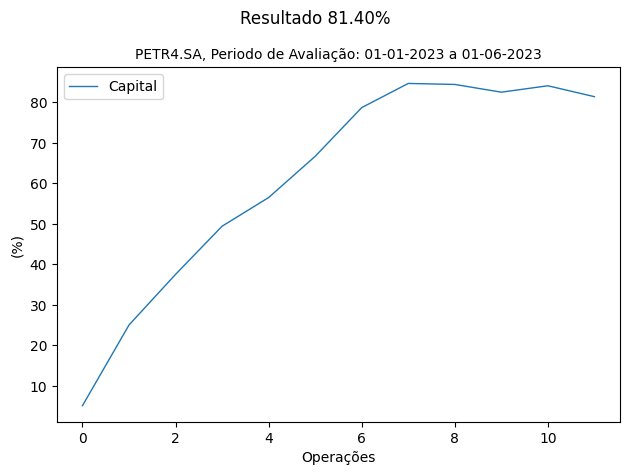

In [ ]:
def get_buy_and_hold(data):
  first_price = data.iloc[0]
  last_price = data.iloc[-1]
  return ((last_price-first_price)/first_price)*100

def get_drawdown(data):
  data['HighValue'] = data['total_profit'].cummax()
  data['Drawdown'] = data['total_profit']-data['HighValue']
  return data['Drawdown'].min(),data['Drawdown'].mean()

def run_trained_model(model_path, data, window_size):
    trader = AI_Trader(window_size)
    trader.model = tf.keras.models.load_model(model_path)

    state = state_creator(data, 0, window_size + 1)
    quant_operacoes=0
    operacoes_lucro=0
    operacoes_prejuizo=0
    total_profit = 0
    ganho=0
    perda=0
    trader.inventory.clear()
    trader.inventory = []
    gt = {'total_profit': []}

    for t in tqdm(range(len(data) - 1)):
        action = trader.trade(state)
        next_state = state_creator(data, t + 1, window_size + 1)

        # Sem ação
        if action == 0:
          # Apenas um print e Recompensa = 0
          print(" - Sem ação | Total de papeis no portfolio = ", len(trader.inventory))

        # Compra
        if action == 1:
          # Recompensa = 0

          # Adicionamos a ação comprada na array de portfolio
          trader.inventory.append(data[t])

          print(" - AI Trader Comprou: ", stock_price_format(data[t]))

        # Venda (Deve possuir ações no portfolio)
        elif action == 2 and len(trader.inventory) > 0:

          quant_operacoes+=1

          # Remove última ação do portfólio e a retorna
          buy_price = trader.inventory.pop(0)

          #total_profit += data[t] - buy_price # Soma ao lucro/prejuízo total

          if (data[t] - buy_price > 0):
            operacoes_lucro+=1
            ganho+=((data[t]-buy_price)/buy_price)*100
            total_profit +=((data[t]-buy_price)/buy_price)*100
          else:
            operacoes_prejuizo+=1
            perda+=((data[t]-buy_price)/buy_price)*100
            total_profit +=((data[t]-buy_price)/buy_price)*100

          gt['total_profit'].append(total_profit)

          print(" - AI Trader Vendeu: ", stock_price_format(data[t]), " - Lucro: " + stock_price_format(data[t] - buy_price) )
        state = next_state


    taxa_acerto=(operacoes_lucro/quant_operacoes)*100
    taxa_erro=(operacoes_prejuizo/quant_operacoes)*100

    plt.figure()
    plt.plot(gt['total_profit'],linewidth=1)
    plt.xlabel('Operações')
    plt.ylabel('(%)')
    plt.suptitle(f"Resultado {total_profit:.2f}%")
    plt.title("PETR4.SA, Periodo de Avaliação: 01-01-2023 a 01-06-2023", fontsize=10)
    plt.legend(['Capital'])
    plt.tight_layout()
    plot_filename = 'resultado_plot.png'
    plt.savefig(plot_filename)
    #files.download(plot_filename)
    aux = pd.DataFrame(gt)
    minD,meanD = get_drawdown(aux)
    print("Min = ",minD)
    print("Mean = ",meanD)

    return total_profit, taxa_acerto, taxa_erro, ganho, perda, quant_operacoes


uploaded = files.upload()
file_name = list(uploaded.keys())[0]
model_path = file_name

new_data = dataset_loader("PETR4.SA", "2023-01-01", "2023-06-01")
inicio = time.time()

total_profit, taxa_acerto, taxa_erro, ganho, perda, quant_operacoes= run_trained_model(model_path, new_data, window_size = 10)

fim = time.time()

tempo_execucao=fim - inicio
buy_and_hold = get_buy_and_hold(new_data)
#Print do tempo que demorou para rodar a parte específica do código
print(f"Tempo de Execucao: {tempo_execucao} segundos")
print(f"Taxa de Acerto: {taxa_acerto} %")
print(f"Taxa de Erro: {taxa_erro} %")
print(f"Ganho: {ganho} %")
print(f"Perda: {abs(perda)} %")
print(f"payoff: {ganho/abs(perda)}")
print(f"Lucro Total: {total_profit} %")
print(f"Buy and Hold: {buy_and_hold} %")
print(f"Total de Operacoes: {quant_operacoes}")
#vale3 petr4 itub4 bbdc4 bbas3 ,   fonte:trading map